In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/FR_category_id.json
/kaggle/input/MX_category_id.json
/kaggle/input/JP_category_id.json
/kaggle/input/GB_category_id.json
/kaggle/input/IN_category_id.json
/kaggle/input/RUvideos.csv
/kaggle/input/CA_category_id.json
/kaggle/input/INvideos.csv
/kaggle/input/CAvideos.csv
/kaggle/input/KR_category_id.json
/kaggle/input/GBvideos.csv
/kaggle/input/DE_category_id.json
/kaggle/input/MXvideos.csv
/kaggle/input/KRvideos.csv
/kaggle/input/DEvideos.csv
/kaggle/input/RU_category_id.json
/kaggle/input/USvideos.csv
/kaggle/input/JPvideos.csv
/kaggle/input/FRvideos.csv
/kaggle/input/US_category_id.json


In [2]:
data = pd.read_csv('../input/CAvideos.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


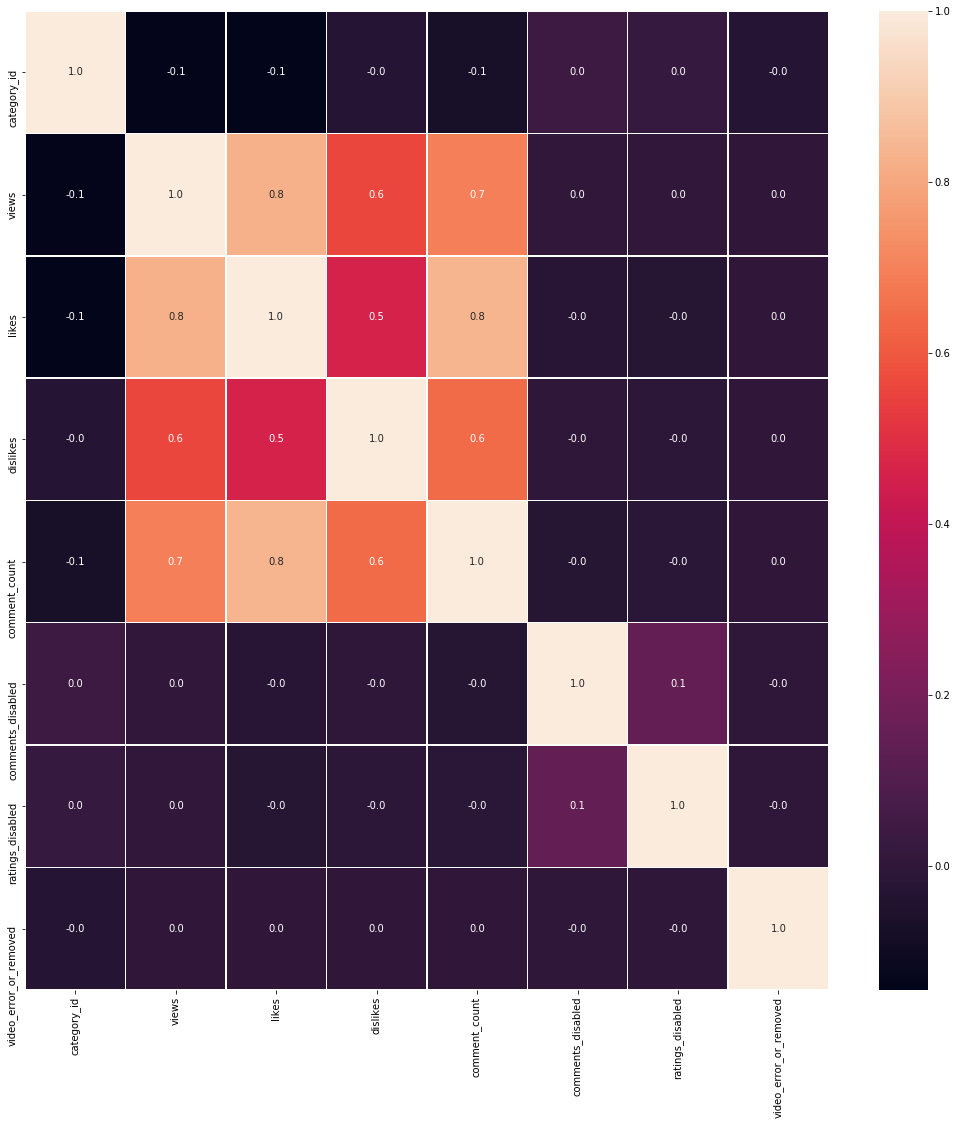

In [5]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [6]:
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...


In [7]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

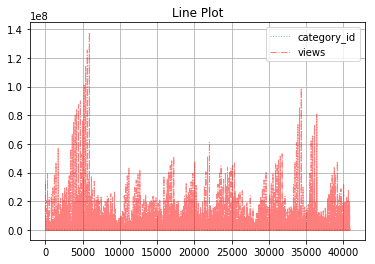

In [8]:
data.category_id.plot(kind = 'line', color = 'g',label = 'category_id',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.views.plot(color = 'r',label = 'views',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')

plt.legend(loc='upper right')  

plt.title('Line Plot')

plt.show()

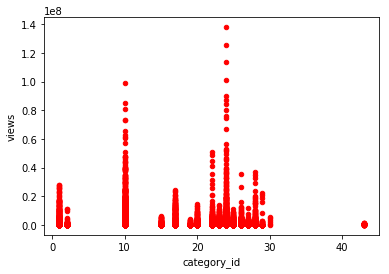

In [9]:
data.plot(kind='scatter',x = 'category_id',y = 'views',color='red')
plt.show()

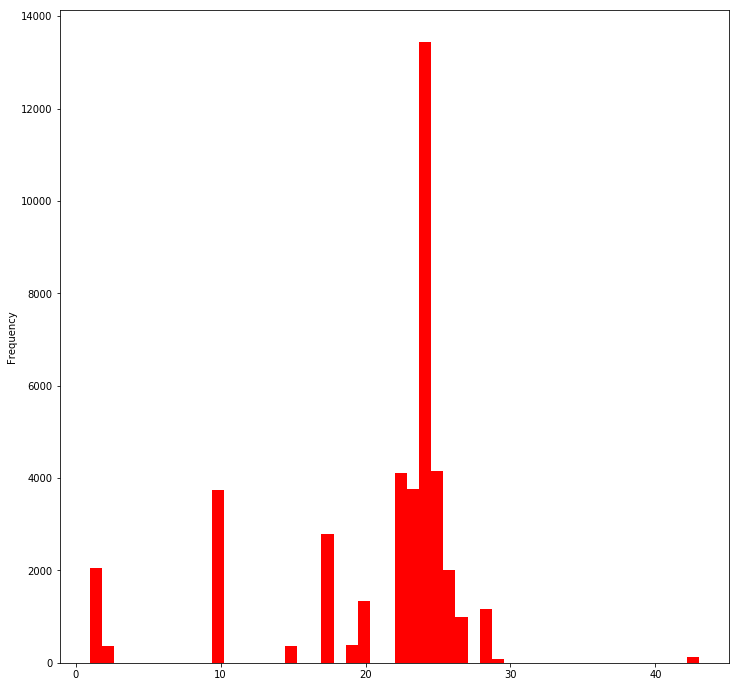

In [10]:
data.category_id.plot(kind='hist',bins=50,color='red',figsize=(12,12))
plt.show()

In [11]:
dictionary = {'barcelona':'messi','juventus':'ronaldo','fenerbahce':'Alex de Souza'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['barcelona', 'juventus', 'fenerbahce'])
dict_values(['messi', 'ronaldo', 'Alex de Souza'])


In [12]:
series = data['views']
dataframe = data[['category_id']]
print(type(series))
print(type(dataframe))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
k = data[(data['category_id']>10) & (data['views'] < 100000)]

In [14]:
data[k]

ValueError: Must pass DataFrame with boolean values only

In [15]:
data[np.logical_and(data['views']<10000,data['category_id']>10)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,t3FYESkzjUI,17.14.11,Emotionally Responsive Digital Human,Soul Machines,22,2017-10-31T01:11:48.000Z,"artificial intelligence|""digital human""|""virtu...",3684,4,5,1,https://i.ytimg.com/vi/t3FYESkzjUI/default.jpg,False,False,False,Soul Machines is making machines more human
60,0PkVodF5QQ8,17.14.11,"Valérie Plante, la première mairesse de Montré...",mart lat,24,2017-11-13T02:17:01.000Z,"Valérie Plante|""mairesse""|""Montréal""|""Tout Le ...",9368,75,15,28,https://i.ytimg.com/vi/0PkVodF5QQ8/default.jpg,False,False,False,"La première mairesse de Montréal, Valérie Plan..."
313,8sdQ7dP9Drs,17.15.11,"Today's News: It's On - Get The Goods, Novembe...",Whistler Blackcomb,17,2017-11-14T18:18:21.000Z,[none],4851,31,0,0,https://i.ytimg.com/vi/8sdQ7dP9Drs/default.jpg,False,False,False,Today’s news: it’s on. Whistler Mountain will ...
335,ZO1nhDbqL-s,17.15.11,Egg Burrito - Protein Treats By Nutracelle,Protein Treats,26,2017-11-13T16:03:55.000Z,"food|""low carb""|""sugar free""|""gluten free""|""nu...",6236,28,6,3,https://i.ytimg.com/vi/ZO1nhDbqL-s/default.jpg,False,False,False,Breakfast has never been more delicious! Skip ...
385,ClwBTkLiivk,17.15.11,Week 4 Challenge: Check out “My Email Leads”,CREA | ACI,29,2017-11-13T13:46:37.000Z,CREA,1898,0,0,0,https://i.ytimg.com/vi/ClwBTkLiivk/default.jpg,True,False,False,www.realtor.ca/2mins
437,e3cAjHLA-iU,17.16.11,Il fait la statue et échappe à la police penda...,jean registre,22,2017-11-15T03:09:59.000Z,[none],5386,7,2,1,https://i.ytimg.com/vi/e3cAjHLA-iU/default.jpg,False,False,False,NaN
504,N3rcUtXjTA8,17.16.11,“Meltdown!” Trump trolls UN Climate Conference...,Rebel Media,25,2017-11-15T17:49:13.000Z,"news|""Rebel Media""|""RebelMedia""|""UN""|""Climate ...",7742,761,9,269,https://i.ytimg.com/vi/N3rcUtXjTA8/default.jpg,False,False,False,Sheila Gunn Reid of TheRebel.media reports tha...
505,PEv21CrTRSg,17.16.11,Avant d'être morte - Épisode 02,rosalie vaillancourt,23,2017-11-14T22:16:27.000Z,"humour|""rosalie""|""rosalie vaillancourt""|""websé...",7966,410,14,33,https://i.ytimg.com/vi/PEv21CrTRSg/default.jpg,False,False,False,💀 Épisode 02 - Coucher avec une vedette 💀\n\nI...
510,IkQhv4qzbc4,17.16.11,Decades of memories gone,Castanet News,25,2017-11-14T22:06:48.000Z,"Decades of memories gone|""YouTube Ends""",3663,2,0,2,https://i.ytimg.com/vi/IkQhv4qzbc4/default.jpg,False,False,False,A lady in Kelowna spent hours on Christmas pot...
542,TWKzDGCLI9w,17.16.11,OG Anunoby 16 Points Full Highlights (11/14/2017),DownToBuck,17,2017-11-15T07:18:38.000Z,"OG Anunoby|""Highlights""|""Toronto Raptors""|""Roo...",7494,136,0,44,https://i.ytimg.com/vi/TWKzDGCLI9w/default.jpg,False,False,False,I don't see what's wrong with the name Ogugua....


In [16]:
for key,value in dictionary.items():
    print(key,":",value)
    
print()

for index,value in data[['views']][0:5].iterrows():
    print(index,":",value)

barcelona : messi
juventus : ronaldo
fenerbahce : Alex de Souza

0 : views    17158579
Name: 0, dtype: int64
1 : views    1014651
Name: 1, dtype: int64
2 : views    3191434
Name: 2, dtype: int64
3 : views    2095828
Name: 3, dtype: int64
4 : views    33523622
Name: 4, dtype: int64


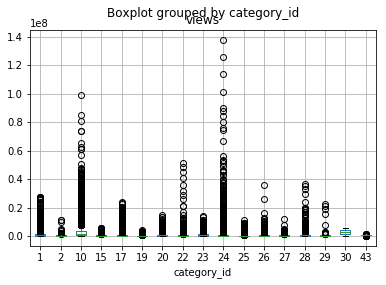

In [17]:
data.boxplot(column='views',by='category_id')